## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns # this is used to color the graps
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
ame=pd.read_csv('Intel ML\\Intel Data\\Ames_Housing_Sales.csv')
ame

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [25]:
# Import the data using Pandas and examine the shape. 
#There are 79 feature columns plus the predictor, the sale price (SalePrice).
ame.shape

(1379, 80)

In [24]:
ame.dtypes

1stFlrSF        float64
2ndFlrSF        float64
3SsnPorch       float64
Alley            object
BedroomAbvGr      int64
                 ...   
WoodDeckSF      float64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
SalePrice       float64
Length: 80, dtype: object

In [8]:
# There are three different types: integers (int64), floats (float64), and strings (object, categoricals). Examine how many there are of each data type.
int_cols=ame.columns[ame.dtypes==np.int64]
print(int_cols)
int_cols.value_counts().sum()

Index(['BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces',
       'FullBath', 'GarageCars', 'HalfBath', 'KitchenAbvGr', 'MSSubClass',
       'MoSold', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


16

In [26]:
ame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
1stFlrSF         1379 non-null float64
2ndFlrSF         1379 non-null float64
3SsnPorch        1379 non-null float64
Alley            1379 non-null object
BedroomAbvGr     1379 non-null int64
BldgType         1379 non-null object
BsmtCond         1379 non-null object
BsmtExposure     1379 non-null object
BsmtFinSF1       1379 non-null float64
BsmtFinSF2       1379 non-null float64
BsmtFinType1     1379 non-null object
BsmtFinType2     1379 non-null object
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtQual         1379 non-null object
BsmtUnfSF        1379 non-null float64
CentralAir       1379 non-null object
Condition1       1379 non-null object
Condition2       1379 non-null object
Electrical       1379 non-null object
EnclosedPorch    1379 non-null float64
ExterCond        1379 non-null object
ExterQual        1379 non-null object
Exterior1st    

In [9]:
float_cols=ame.columns[ame.dtypes==np.float64]
print(float_cols)
float_cols.value_counts().sum()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')


21

In [10]:
object_cols=ame.columns[ame.dtypes==object]
print(float_cols)
object_cols.value_counts().sum()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')


43

In [27]:
# Seperate the features and target
features=ame.drop('SalePrice',axis=1)
target=ame['SalePrice']

In [28]:
# Create a new DataFrame with numerical columns only from features.
num_cols=features.columns[features.dtypes!=object]
features[num_cols]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [29]:
a=pd.DataFrame(features[num_cols])
a

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [30]:
# Calculate the statistical values for all the numerical columns.
features[num_cols].describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,5.577955,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.081031,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,9.000000,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000


(array([105., 692., 367., 134.,  52.,  18.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <a list of 10 Patch objects>)

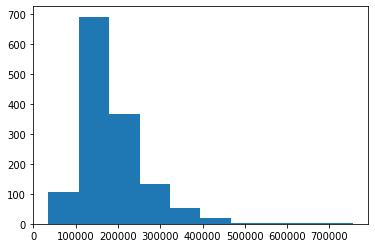

In [16]:
#Plot the histogram for Sales column i.e Target
plt.hist(target)

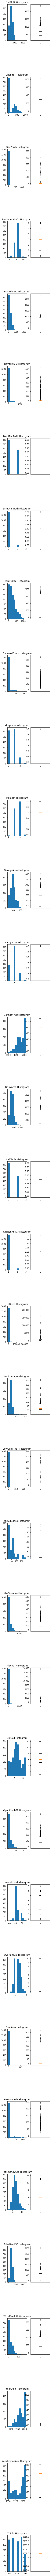

In [20]:
#Plot the histogram and Boxplot for all the numerical columns 
plt.figure(figsize=(4,250))
plt.subplots_adjust(hspace=1)
for i in range(len(num_cols)):
    plt.subplot(36,2,2*i+1)
    plt.hist(features[num_cols[i]])
    plt.title(num_cols[i]+' Histogram')
    plt.subplot(36,2,2*i+2)
    plt.boxplot(features[num_cols[i]])

In [31]:
 # - Observe the histograms and apply np.log or np.log1p for the  Skewed data
a = np.log1p(features[num_cols])
a

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,...,1.791759,2.079442,0.0,0.0,2.197225,6.753438,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,...,2.197225,1.945910,0.0,0.0,1.945910,7.141245,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,...,1.791759,2.079442,0.0,0.0,1.945910,6.825460,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,...,1.791759,2.079442,0.0,0.0,2.079442,6.629363,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,...,1.791759,2.197225,0.0,0.0,2.302585,7.044033,5.262690,7.601402,7.601402,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,6.860664,6.543912,0.0,1.386294,0.000000,0.000000,0.000000,0.000000,6.860664,0.000000,...,1.791759,1.945910,0.0,0.0,2.079442,6.860664,0.000000,7.600902,7.601402,7.604894
1375,7.637234,0.000000,0.0,1.386294,6.673298,5.099866,0.693147,0.000000,6.380123,0.000000,...,1.945910,1.945910,0.0,0.0,2.079442,7.341484,5.857933,7.590347,7.595387,7.606387
1376,7.080868,7.050123,0.0,1.609438,5.620401,0.000000,0.000000,0.000000,6.777647,0.000000,...,2.302585,2.079442,0.0,0.0,2.302585,7.050123,0.000000,7.571474,7.604396,7.606387
1377,6.983790,0.000000,0.0,1.098612,3.912023,6.937314,0.693147,0.000000,0.000000,4.727388,...,1.945910,1.791759,0.0,0.0,1.791759,6.983790,5.905362,7.576097,7.599401,7.606387


In [32]:
a

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,...,1.791759,2.079442,0.0,0.0,2.197225,6.753438,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,...,2.197225,1.945910,0.0,0.0,1.945910,7.141245,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,...,1.791759,2.079442,0.0,0.0,1.945910,6.825460,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,...,1.791759,2.079442,0.0,0.0,2.079442,6.629363,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,...,1.791759,2.197225,0.0,0.0,2.302585,7.044033,5.262690,7.601402,7.601402,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,6.860664,6.543912,0.0,1.386294,0.000000,0.000000,0.000000,0.000000,6.860664,0.000000,...,1.791759,1.945910,0.0,0.0,2.079442,6.860664,0.000000,7.600902,7.601402,7.604894
1375,7.637234,0.000000,0.0,1.386294,6.673298,5.099866,0.693147,0.000000,6.380123,0.000000,...,1.945910,1.945910,0.0,0.0,2.079442,7.341484,5.857933,7.590347,7.595387,7.606387
1376,7.080868,7.050123,0.0,1.609438,5.620401,0.000000,0.000000,0.000000,6.777647,0.000000,...,2.302585,2.079442,0.0,0.0,2.302585,7.050123,0.000000,7.571474,7.604396,7.606387
1377,6.983790,0.000000,0.0,1.098612,3.912023,6.937314,0.693147,0.000000,0.000000,4.727388,...,1.945910,1.791759,0.0,0.0,1.791759,6.983790,5.905362,7.576097,7.599401,7.606387


In [19]:
  #- Observe the Boxplots and identify features with outliers
plt.figure(figsize=(10,100))
plt.subplots_adjust(hspace =0.5, wspace=0.5)
for i in range((len(sq_num_col))):
    plt.subplot(36,2,2*i+1)
    plt.hist(sq_num[sq_num_col[i]])
    plt.title(sq_num_col[i]+" Histogram")
    plt.subplot(36,2,2*i+2)
    plt.boxplot(sq_num[sq_num_col[i]])
    plt.title(sq_num_col[i]+" Subplot")

NameError: name 'sq_num_col' is not defined

<Figure size 720x7200 with 0 Axes>

In [34]:
# Apply MinMaxScaler on the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(a)
num_features_sc = pd.DataFrame(sc.transform(a),columns = a.columns)
num_features_sc



,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.282333,0.884420,0.0,0.712414,0.759508,0.000000,0.63093,0.00000,0.646838,0.000000,...,0.575717,0.754900,0.0,0.0,0.688013,0.774668,0.000000,0.947823,0.884882,0.500249
1,0.446011,0.000000,0.0,0.712414,0.797188,0.000000,0.00000,0.63093,0.728731,0.000000,...,0.912489,0.652127,0.0,0.0,0.474792,0.819153,0.843935,0.744846,0.437057,0.250187
2,0.312730,0.886245,0.0,0.712414,0.716357,0.000000,0.63093,0.00000,0.783246,0.000000,...,0.575717,0.754900,0.0,0.0,0.474792,0.782930,0.000000,0.932882,0.868404,0.500249
3,0.331113,0.868471,0.0,0.712414,0.622780,0.000000,0.63093,0.00000,0.811361,0.888227,...,0.575717,0.754900,0.0,0.0,0.588083,0.760436,0.000000,0.275872,0.336710,0.000000
4,0.404981,0.911832,0.0,0.827087,0.750841,0.000000,0.63093,0.00000,0.798858,0.000000,...,0.575717,0.845553,0.0,0.0,0.777404,0.808002,0.779126,0.925405,0.835423,0.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.327588,0.857277,0.0,0.712414,0.000000,0.000000,0.00000,0.00000,0.884491,0.000000,...,0.575717,0.652127,0.0,0.0,0.588083,0.786968,0.000000,0.917925,0.835423,0.250187
1375,0.655348,0.000000,0.0,0.712414,0.772504,0.698955,0.63093,0.00000,0.822539,0.000000,...,0.703752,0.652127,0.0,0.0,0.588083,0.842121,0.867250,0.759976,0.636841,1.000000
1376,0.420528,0.923592,0.0,0.827087,0.650620,0.000000,0.00000,0.00000,0.873788,0.000000,...,1.000000,0.754900,0.0,0.0,0.777404,0.808700,0.000000,0.477563,0.934267,1.000000
1377,0.379555,0.000000,0.0,0.564575,0.452858,0.950784,0.63093,0.00000,0.000000,0.748554,...,0.703752,0.533484,0.0,0.0,0.344007,0.801091,0.874272,0.546750,0.769361,1.000000


In [38]:
#* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
#* For the data set, fit a basic linear regression model on the training data. 
#* Calculate the mean squared error on both the train and test sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split\
            (num_features_sc,target,random_state= 44)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_train)
print('training',mean_squared_error(y_pred,y_train))
y_pred = LR.predict(x_test)
print('testing',mean_squared_error(y_pred,y_test))

training 1215588547.1631787
testing 2110723251.660745


In [37]:
#For the data set, fit KNeighnorRegressor model on the training data.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
print('training',mean_squared_error(y_pred,y_train))
y_pred = knn.predict(x_test)
print('testing',mean_squared_error(y_pred,y_test))
#Calculate the mean squared error on both the train and test sets.

training 1302835495.0892456
testing 2490369826.0403476


In [45]:
#* For The data set, Fit KNeighnorRegressor model on the training data with neighbors ranging from 2 to 15 with interval 2.
#* Create a dictionary with keys as neighbors numbers. Values as list where first element in the list is mean squared error for train data, second element in the list is mean squared error for train data
k_errors ={}
for i in range(3,25,2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    #print('training',mean_squared_error(y_pred,y_train))
    k_errors[i]= [mean_squared_error(y_pred,y_train)]
    y_pred = knn.predict(x_test)
    k_errors[i].append(mean_squared_error(y_pred,y_test))
k_errors

{3: [1105785137.2014828, 2503133397.7694035],
 5: [1302835495.0892456, 2490369826.0403476],
 7: [1459463049.6488175, 2356272907.2725224],
 9: [1505887548.6266925, 2423057731.945643],
 11: [1595059131.1360202, 2451464619.7419815],
 13: [1635981294.1394708, 2484222518.0242515],
 15: [1685081359.3965871, 2479592426.319253],
 17: [1723899710.820876, 2537977651.82385],
 19: [1760411497.4052892, 2567359741.4877753],
 21: [1802590654.7938876, 2628257838.57369],
 23: [1819143835.1755657, 2637285838.9857097]}

([<matplotlib.axis.XTick at 0x1f83b730f48>,
 <a list of 22 Text xticklabel objects>)

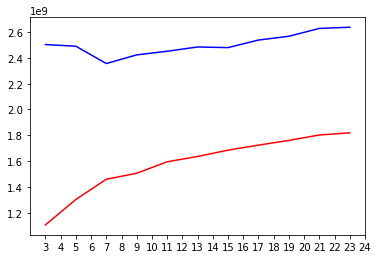

In [47]:
#Plot a curve by taking neighbors on X axis and Error on Y axis. 
#- Plot the curve for training data error
#- Plot the curve test data error
plt.plot(list(k_errors.keys()),[x[0] for x in k_errors.values()],'r')
plt.plot(list(k_errors.keys()),[x[1] for x in k_errors.values()],'b')
plt.xticks(range(3,25))

In [ ]:
# Observe the graph and identify how many number of neighbors is the best for this data

In [48]:
#* Calculate the cross validation score with cv=4,KNN model for training data
#* Use the above selected number of neighbors for KNN
from sklearn.model_selection import cross_val_score
knn1 = KNeighborsRegressor(n_neighbors=8)
cross_val_score(knn1,x_train,y_train,cv=4)

array([0.65019742, 0.60651339, 0.71749334, 0.73626637])

In [49]:
# Calculate the cross validation score with cv=4,LinearRegressor model for training data
LR1 = LinearRegression()
cross_val_score(LR1,x_train,y_train,cv=4)


array([0.72051024, 0.79562189, 0.80371718, 0.80397298])